## Sistemas Inteligentes para a Bioinformática (Intelligent Systems for Bioinformatics)

Notebook of the Intelligent Systems for Bioinformatics Curricular Unit's group project integrated in the Master's Degree in Bioinformatics at University of Minho, 2022/2023

**Group members**:
- Ana Carolina Inácio, PG45459;
- Ana Rafaela Pereira, PG45461;
- Mariana Coelho, PG45967

**Dataset used in this project**:
"Heart Attack Analysis & Prediction Dataset", a dataset for heart attack classification, available at https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

# About this dataset...
- **age**: age of the patient
- **sex**: sex of the patient
- **cp**: chest pain type
  - Value 0: typical angina
  - Value 1: atypical angina
  - Value 2: non-anginal pain
  - Value 3: asymptomatic
- **trtbps**: resting blood pressure (in mm Hg)
- **chol**: cholesterol in mg/dl fetched via BMI sensor
- **fbs**: (fasting blood sugar > 120 mg/dl)
  - 1 = true
  - 0 = false
- **restecg**: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh**: maximum heart rate achieved
- **exng**: exercise induced angina
  - 1 = yes
  - 0 = no
- **oldpeak**: ST depression induced by exercise relative to rest
- **slp**: the slope of the peak exercise ST segment
  - 0 = unsloping
  - 1 = flat
  - 2 = downsloping
- **caa**: number of major vessels (0-3)
- **thall**: thalassemia
  - 0 = null
  - 1 = fixed defect
  - 2 = normal
  - 3 = reversable defect
- **output**: diagnosis of heart disease (angiographic disease status) - target variable
  - 0: < 50% diameter narrowing. less chance of heart disease
  - 1: > 50% diameter narrowing. more chance of heart disease

## In this notebook, you can find...
- Data pre-processing
- Exploratory data analysis
- Statistical tests and correlation
- Machine learning (Supervised learning, classification problem)
  - Model fitting (SVM, Logistic Regression and KNN models);
  - Ensemble (Bagging classifier, Random Forest and Voting Classifier);
  - Feature selection (Variance Threshold, Select K-Best and Select Percentile);
  - Hyperparameter tuning (Grid Search and Randomized Parameter Optimization).
- Deep learning (Neural networks)

In [236]:
# imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy
import scipy.stats as stats
from scipy.stats import uniform
from scipy.stats import distributions
import seaborn as sn
import matplotlib.pylab as plt
from sklearn import preprocessing

# Data pre-processing

In [35]:
# read heart.csv file
filepath_heart = 'C:/Users/Ana/Documents/GitHub/mbioinf-sib-group-project/heart.csv'

data = pd.read_csv(filepath_heart)
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
# see 5 first rows
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
# see the last 5 rows
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [38]:
# get shape of heart df
data.shape

(303, 14)

In [39]:
# check the type of variables
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [40]:
# search for NaN values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [41]:
# remove NaN values
# data = dataset.dropna()
# data

In [42]:
# get shape of the dataset
data.shape

(303, 14)

In [43]:
# get the summary of the dataset
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [44]:
# check all data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
# get list of co
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Exploratory data analysis

In [46]:
# get range of values of the variables
data.apply(lambda x: str(x.min()) + "---" + str(x.max()))

age           29---77
sex             0---1
cp              0---3
trtbps       94---200
chol        126---564
fbs             0---1
restecg         0---2
thalachh     71---202
exng            0---1
oldpeak     0.0---6.2
slp             0---2
caa             0---4
thall           0---3
output          0---1
dtype: object

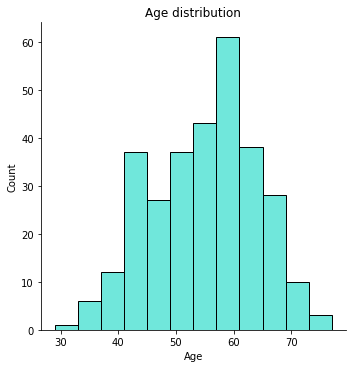

In [47]:
# check the distribution of age
sn.displot(data=data, x="age", color="turquoise")
plt.xlabel("Age")
plt.title("Age distribution")
plt.show()

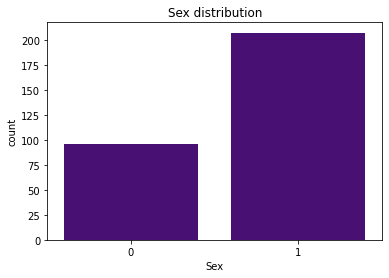

In [48]:
# check the distribution of sex
sn.countplot(data=data, x="sex", color="indigo")
plt.xlabel("Sex")
plt.title("Sex distribution")
plt.show()

**age:** 1: male; 0: female

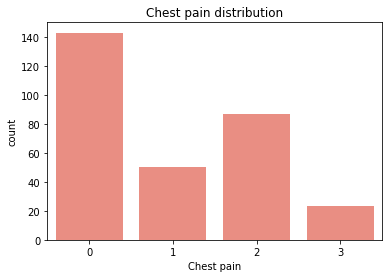

In [49]:
# check the distribution of chest pain
sn.countplot(data=data, x="cp", color="salmon")
plt.xlabel("Chest pain")
plt.title("Chest pain distribution")
plt.show()

**chest pain:** 0: typical angina; 1: atypical angina; 2: non-anginal pain; 3: asymptomatic

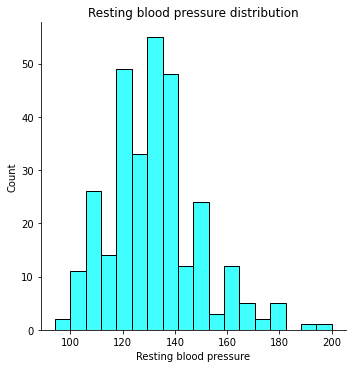

In [50]:
# check the distribution of resting blood pressure
sn.displot(data=data, x="trtbps", color="aqua")
plt.xlabel("Resting blood pressure")
plt.title("Resting blood pressure distribution")
plt.show()

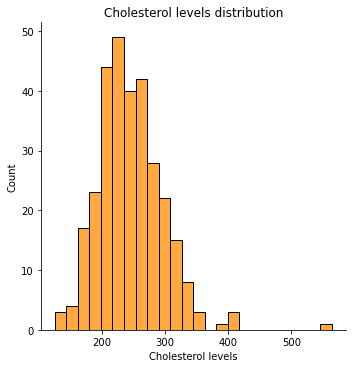

In [51]:
# check the distribution of cholesterol
sn.displot(data=data, x="chol", color="darkorange")
plt.xlabel("Cholesterol levels")
plt.title("Cholesterol levels distribution")
plt.show()

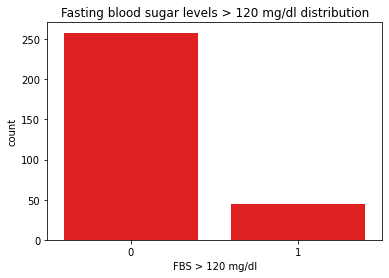

In [52]:
# check the distribution of fasting blood sugar levels
sn.countplot(data=data, x="fbs", color="red")
plt.xlabel("FBS > 120 mg/dl")
plt.title("Fasting blood sugar levels > 120 mg/dl distribution")
plt.show()

**fasting blood sugar :** 1 = true; 0 = false

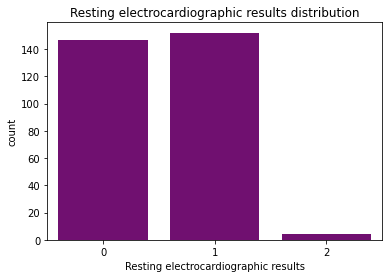

In [53]:
# check the distribution of restecg
sn.countplot(data=data, x="restecg", color="purple")
plt.xlabel("Resting electrocardiographic results")
plt.title("Resting electrocardiographic results distribution")
plt.show()

**resting electrocardiographic results:** 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

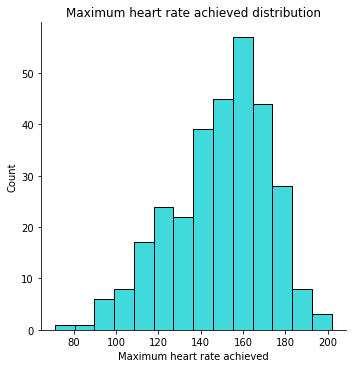

In [54]:
# check the distribution of thalachh
sn.displot(data=data, x="thalachh", color="darkturquoise")
plt.xlabel("Maximum heart rate achieved")
plt.title("Maximum heart rate achieved distribution")
plt.show()

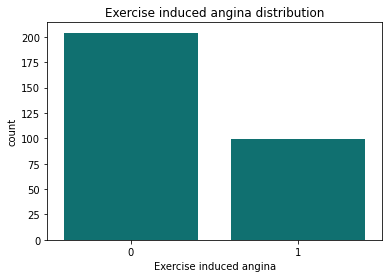

In [55]:
# check the distribution of exng
sn.countplot(data=data, x="exng", color="teal")
plt.xlabel("Exercise induced angina")
plt.title("Exercise induced angina distribution")
plt.show()

**exercise induced angina:** 1: yes; 0: no

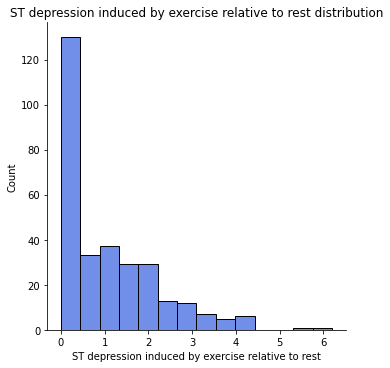

In [56]:
# check the distribution of oldpeak
sn.displot(data=data, x="oldpeak", color="royalblue")
plt.xlabel("ST depression induced by exercise relative to rest")
plt.title("ST depression induced by exercise relative to rest distribution")
plt.show()

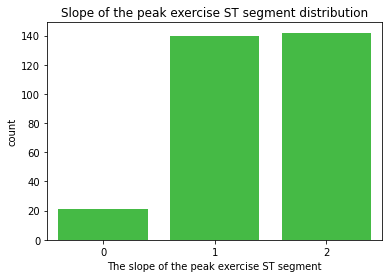

In [57]:
# check the distribution of slp
sn.countplot(data=data, x="slp", color="limegreen")
plt.xlabel("The slope of the peak exercise ST segment")
plt.title("Slope of the peak exercise ST segment distribution")
plt.show()

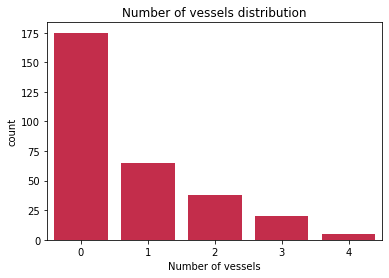

In [58]:
# check the distribution of caa
sn.countplot(data=data, x="caa", color="crimson")
plt.xlabel("Number of vessels")
plt.title("Number of vessels distribution")
plt.show()

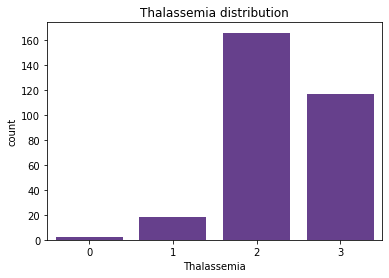

In [59]:
# check the distribution of thall
sn.countplot(data=data, x="thall", color="rebeccapurple")
plt.xlabel("Thalassemia")
plt.title("Thalassemia distribution")
plt.show()

**thalassemia:** 0: null; 1: fixed defect; 2: normal; 3: reversable defect

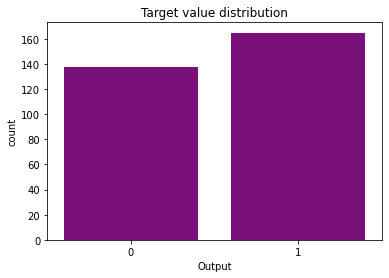

In [60]:
# check the distribution of output (our target variable)
# 0 = less chance of heart attack; 1 = more chance of heart attack
sn.countplot(data=data, x="output", color="darkmagenta")
plt.xlabel("Output")
plt.title("Target value distribution")
plt.show()

**output (target variable):** 0: < 50% diameter narrowing. less chance of heart disease; 1: > 50% diameter narrowing. more chance of heart disease

In [61]:
# analysis of the categorical variables
categorical_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall"]
data_categorical = data.loc[:,categorical_var]
data_categorical

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


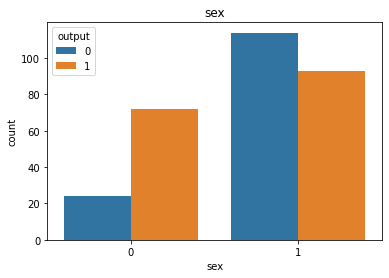

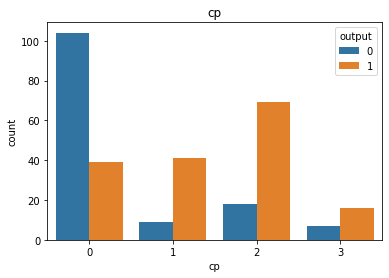

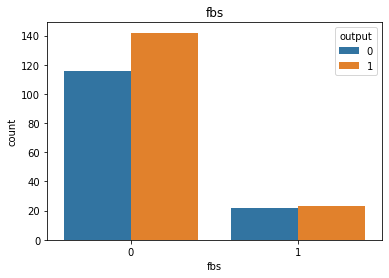

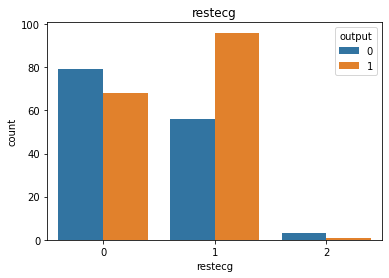

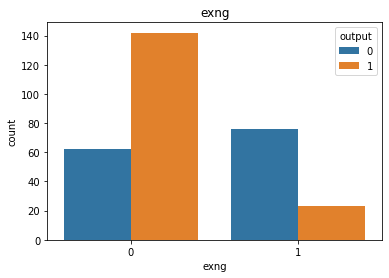

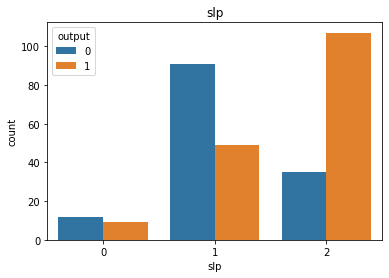

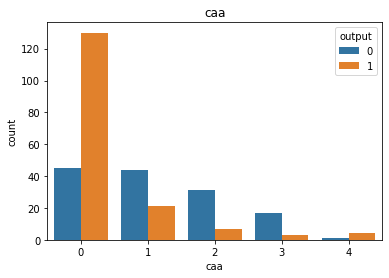

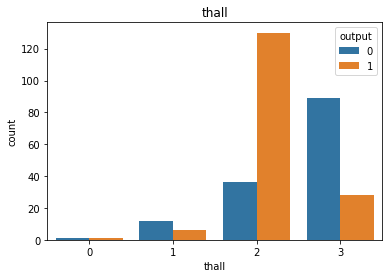

In [62]:
# plotting the categorical variables against the target variable
for i in categorical_var:
    plt.figure()
    sn.countplot(x=i, data=data, hue="output") #, color="darkblue")
    plt.title(i)

In [63]:
# get the numeric variables dataframe
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
data_numeric = data[numeric_var]
data_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


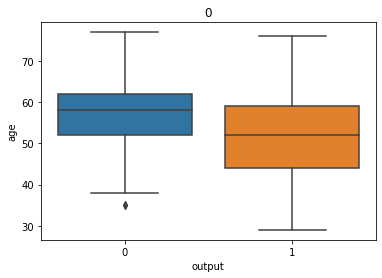

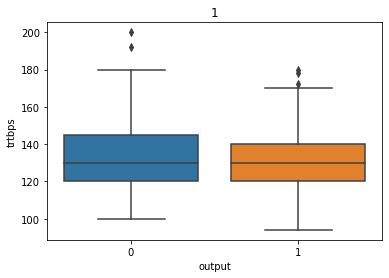

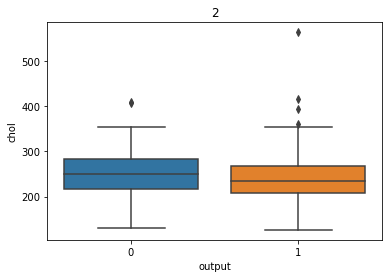

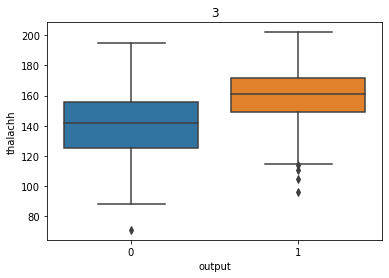

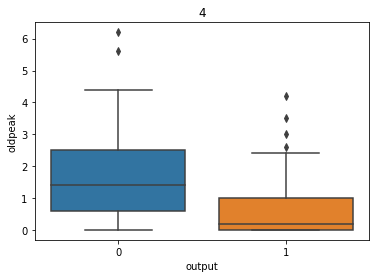

In [64]:
# plotting the numeric variables against the target variable
for i in range(len(numeric_var)):
    plt.figure()
    column = numeric_var[i]
    sn.boxplot(x='output', y=column, data=data) #, color="darkblue")
    plt.title(i)

# Statistical tests and correlation

In [65]:
# logarithmic transformation
log_data = np.log2(data)

In [66]:
# scaling the data
array_data = preprocessing.scale(data)
data_scale = pd.DataFrame(array_data, index=data.index, columns=data.columns)
data_scale

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,0.914529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,-1.093459
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,-1.093459
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,-1.093459
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,-1.093459


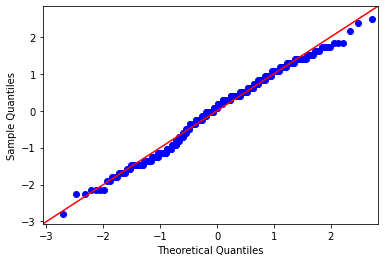

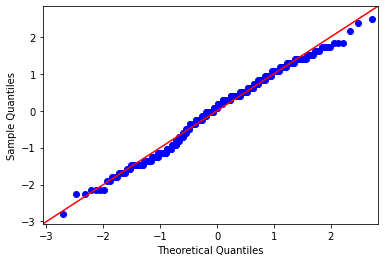

In [76]:
# check if age follows a normal distribution
sm.qqplot(data_scale.age, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

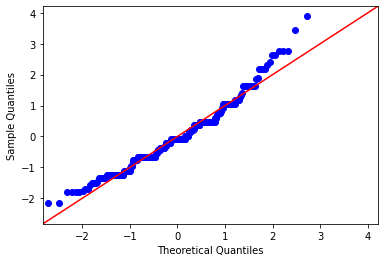

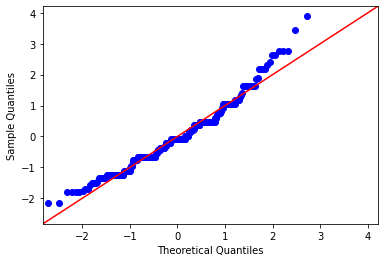

In [77]:
# check if trtbps follows a normal distribution
sm.qqplot(data_scale.trtbps, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

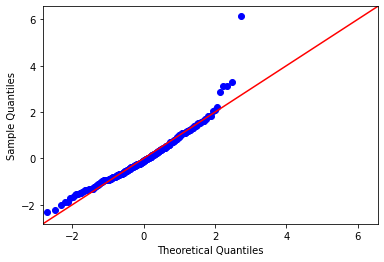

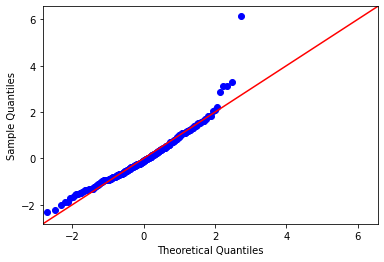

In [78]:
# check if chol follows a normal distribution
sm.qqplot(data_scale.chol, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

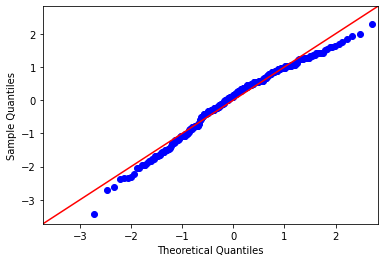

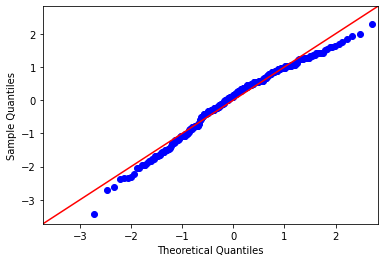

In [79]:
# check if thalachh follows a normal distribution
sm.qqplot(data_scale.thalachh, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

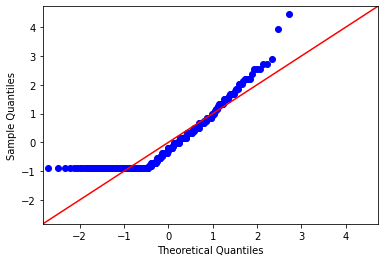

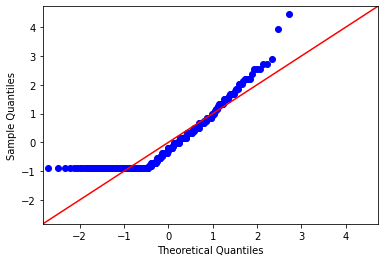

In [80]:
# check if oldpeak follows a normal distribution
sm.qqplot(data_scale.oldpeak, dist=stats.norm, distargs=(), a=0, loc=0, scale=1, fit=False, line='45', ax=None)

In [82]:
data_scale.shape

(303, 14)

In [86]:
# normality test - shapiro test
scipy.stats.shapiro(x=data_scale)
# H0 is rejected - the data is considered to be not normally distributed

ShapiroResult(statistic=0.9619950652122498, pvalue=5.395357439801062e-32)

In [87]:
# creation of the correlation matrix for all variables
corr_matrix_ = data_scale.corr(method='spearman')
corr_matrix_

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.099131,-0.087494,0.285617,0.195786,0.113978,-0.132769,-0.398052,0.089679,0.268291,-0.184048,0.340955,0.087254,-0.238400
sex,-0.099131,1.000000,-0.062041,-0.052941,-0.151342,0.045032,-0.048389,-0.039868,0.141664,0.100715,-0.025010,0.119368,0.250821,-0.280937
cp,-0.087494,-0.062041,1.000000,0.035413,-0.091721,0.089775,0.065640,0.324013,-0.418256,-0.161449,0.159478,-0.216006,-0.207840,0.460860
trtbps,0.285617,-0.052941,0.035413,1.000000,0.126562,0.151984,-0.125841,-0.040407,0.052918,0.154267,-0.086570,0.090140,0.059673,-0.121593
chol,0.195786,-0.151342,-0.091721,0.126562,1.000000,0.018463,-0.161933,-0.046766,0.091514,0.045260,-0.012551,0.111981,0.083628,-0.120888
fbs,0.113978,0.045032,0.089775,0.151984,0.018463,1.000000,-0.081508,-0.014273,0.025665,0.028363,-0.045786,0.134513,-0.006737,-0.028046
restecg,-0.132769,-0.048389,0.065640,-0.125841,-0.161933,-0.081508,1.000000,0.087863,-0.077399,-0.077372,0.113661,-0.097862,-0.010982,0.148612
thalachh,-0.398052,-0.039868,0.324013,-0.040407,-0.046766,-0.014273,0.087863,1.000000,-0.400860,-0.433241,0.436968,-0.257347,-0.160581,0.428370
exng,0.089679,0.141664,-0.418256,0.052918,0.091514,0.025665,-0.077399,-0.400860,1.000000,0.297173,-0.274475,0.162025,0.247113,-0.436757
oldpeak,0.268291,0.100715,-0.161449,0.154267,0.045260,0.028363,-0.077372,-0.433241,0.297173,1.000000,-0.594847,0.224895,0.255026,-0.421487


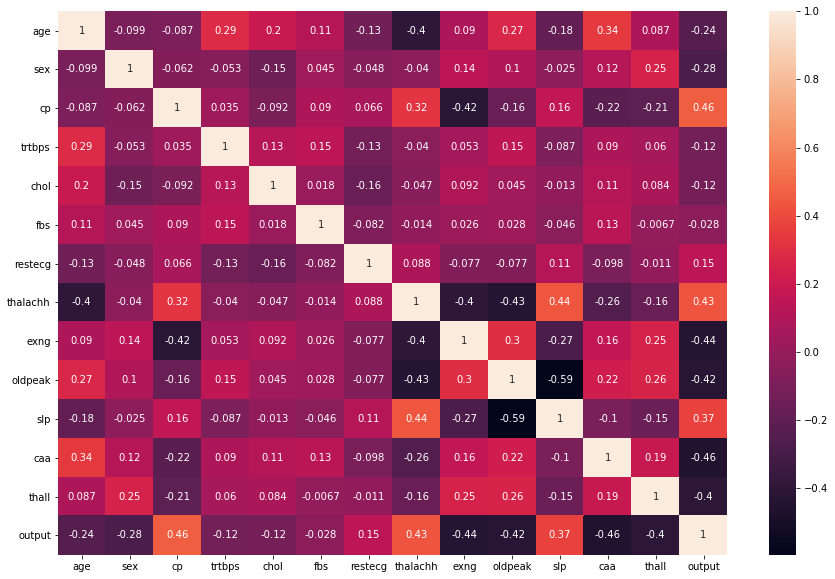

In [88]:
# heatmap of the variables
plt.figure(figsize=(15, 10))
sn.heatmap(corr_matrix_.iloc[:15,:15], annot=True)
plt.show()

Values closer to 1 mean that the variables are more correlated to one another, comparing to values closer to -1.

The more correlated variables to our target variable (output) are cp, thalachh and slp; the less correlated variables are caa, exng, oldpeak and thall.

In [89]:
# creation of the correlation matrix only for categorical variables
corr_matrix = data_categorical.corr(method='spearman')
corr_matrix

,sex,cp,fbs,restecg,exng,slp,caa,thall
sex,1.000000,-0.062041,0.045032,-0.048389,0.141664,-0.025010,0.119368,0.250821
cp,-0.062041,1.000000,0.089775,0.065640,-0.418256,0.159478,-0.216006,-0.207840
fbs,0.045032,0.089775,1.000000,-0.081508,0.025665,-0.045786,0.134513,-0.006737
restecg,-0.048389,0.065640,-0.081508,1.000000,-0.077399,0.113661,-0.097862,-0.010982
exng,0.141664,-0.418256,0.025665,-0.077399,1.000000,-0.274475,0.162025,0.247113
slp,-0.025010,0.159478,-0.045786,0.113661,-0.274475,1.000000,-0.099901,-0.154886
caa,0.119368,-0.216006,0.134513,-0.097862,0.162025,-0.099901,1.000000,0.189103
thall,0.250821,-0.207840,-0.006737,-0.010982,0.247113,-0.154886,0.189103,1.000000


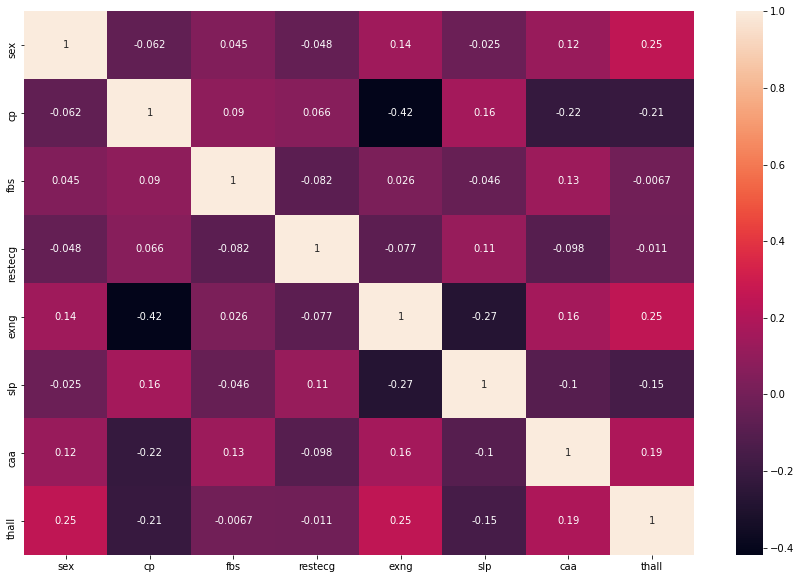

In [90]:
# heatmap of the categorical variables
plt.figure(figsize=(15, 10))
sn.heatmap(corr_matrix.iloc[:15,:15], annot=True)
plt.show()

The more correlated categorical variables to our target variable (output) are cp and slp; the less correlated variables are caa, exng, thall and sex.

As this dataset is a classification problem (supervised learning), we decided not to do the clustering and PCA analysis, since those techniques are used in unsupervised learning. Additionally, our dataset is too small to perform these types of analysis.

# Supervised learning

In [170]:
# imports
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, hinge_loss, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, SelectPercentile

import matplotlib.pyplot as plt

## Model Fitting
- Support Vector Machine
- Logistic Regression
- K-Nearest Neighbors

In [92]:
# check the shape of the dataset
data_scale.shape

(303, 14)

In [93]:
# copy data to create a dataset to get the dummy variables - we can't do the LR on continuous variables, so we need to convert a categorical variable,
# which can take on multiple levels or categories, into multiple binary variables, each of which represents a single level or category of the original
# variable.
dummy_data = data.copy()
dummy_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
# get the list of categorical variables without the target (label)
categorical_var[:-1]

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa']

In [95]:
# use the dummy variables to do the logistic regression
dummy_data = pd.get_dummies(dummy_data, columns=categorical_var[:-1], drop_first=True)
dummy_data

,age,trtbps,chol,thalachh,oldpeak,thall,output,sex_1,cp_1,cp_2,...,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,63,145,233,150,2.3,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,2,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,2,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,56,120,236,178,0.8,2,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0
4,57,120,354,163,0.6,2,1,0,0,0,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,3,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
299,45,110,264,132,1.2,3,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
300,68,144,193,141,3.4,3,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
301,57,130,131,115,1.2,3,0,1,0,0,...,0,1,0,1,1,0,1,0,0,0


In [96]:
# create a pd dataframe with all variables without the target variable - X
X = dummy_data.drop("output", axis=1)
print("Type: ", type(X))
X.head()

Type:  <class 'pandas.core.frame.DataFrame'>


,age,trtbps,chol,thalachh,oldpeak,thall,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,41,130,204,172,1.4,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,56,120,236,178,0.8,2,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4,57,120,354,163,0.6,2,0,0,0,0,0,1,0,1,0,1,0,0,0,0


In [97]:
# create the label array - y
y = dummy_data.output
print("Type: ", type(y))
y.head()

Type:  <class 'pandas.core.series.Series'>


0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [98]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# check dimensions
print("X_train:\n  Length: ", len(X_train), "\n  Shape: ", X_train.shape)
print("X_test:\n  Length: ", len(X_test), "\n  Shape: ", X_test.shape)
print("y_train:\n  Length: ", len(y_train), "\n  Shape: ", y_train.shape)
print("y_test:\n  Length: ", len(y_test), "\n  Shape: ", y_test.shape)

X_train:
  Length:  227 
  Shape:  (227, 20)
X_test:
  Length:  76 
  Shape:  (76, 20)
y_train:
  Length:  227 
  Shape:  (227,)
y_test:
  Length:  76 
  Shape:  (76,)


Standardization

In [99]:
# scale the data
scaler = StandardScaler().fit(X_train)
standardized_X_train = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

### Support Vector Machine

In [211]:
# create an instance of SVC
clf = SVC(kernel='linear')

# perform 5 fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

# cross validation with scoring function F1
scores_f1 = cross_val_score(clf, X, y, scoring="f1_weighted", cv=5)
print("\nScores F1: ", scores_f1)

# cross validation with leave one out
# loo_cv = LeaveOneOut()
# scores_loo = cross_val_score(clf, X, y, cv=loo_cv)
# print("Score mean with leave one out :", scores_loo.mean())

# fit the model on the entire train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test) # predicted labels
# print("\nPredicted values: ", y_pred)
# print("\nReal values: ", y_test)

# calculate score
score_svm = clf.score(X_test, y_test)
print(f"\nScore of SVM model: {score_svm:.5f}")

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of SVM model: {acc:.5f}")

# get classification report
print("\nClassification report of SVM model:\n", classification_report(y_test, y_pred))

# calculate cost - the lower the hinge loss, the better the model
svm_cost = hinge_loss(y_test, y_pred)
print(f"\nCost of SVM model: {svm_cost:.5f}")

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

print("------------------------------------")

Cross validation scores:  [0.86956522 0.84782609 0.75555556 0.86666667 0.8       ]

Scores F1:  [0.63273224 0.63273224 0.66612022 0.74950718 0.68377622]

Score of SVM model: 0.84211

Accuracy of SVM model: 0.84211

Classification report of SVM model:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.85      0.85      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76


Cost of SVM model: 0.61842

Confusion matrix: 
 [[29  6]
 [ 6 35]]
------------------------------------


### Logistic Regression

In [210]:
# create an instance of LogisticRegression
clf = LogisticRegression(random_state=42, max_iter=2900)

# perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

# cross validation with scoring function F1
scores_f1 = cross_val_score(clf, X, y, scoring="f1_weighted", cv=5)
print("\nScores F1: ", scores_f1)

# cross validation with leave one out
# loo_cv = LeaveOneOut()
# scores_loo = cross_val_score(clf, X, y, cv=loo_cv)
# print("Score mean with leave one out :", scores_loo.mean())

# fit the model on the entire train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test) # predicted labels
# print("Predicted values: ", y_pred)
# print("Real values: ", y_test)

# calculate score
score_lr = clf.score(X_test, y_test)
print(f"\nScore of Logistic Regression model: {score_lr:.5f}")

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Logistic Regression model: {acc:.5f}")

# classification report
print("\nClassification report of Logistic Regression model:\n", classification_report(y_test, y_pred))

# cost - the lower the log loss, the better the model is
lr_cost = log_loss(y_test, y_pred)
print(f"\nCost of Logistic Regression model: {lr_cost:.5f}")

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

print("------------------------------------")

Cross validation scores:  [0.82608696 0.86956522 0.71111111 0.88888889 0.8       ]

Scores F1:  [0.63577734 0.65098401 0.73511079 0.76666667 0.70066741]

Score of Logistic Regression model: 0.88158

Accuracy of Logistic Regression model: 0.88158

Classification report of Logistic Regression model:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        35
           1       0.86      0.93      0.89        41

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76


Cost of Logistic Regression model: 4.09018

Confusion matrix: 
 [[29  6]
 [ 3 38]]
------------------------------------


### K-Nearest Neighbors

In [212]:
# create an instance of KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)

# perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)

# cross validation with scoring function F1
scores_f1 = cross_val_score(clf, X, y, scoring="f1_weighted", cv=5)
print("\nScores F1: ", scores_f1)

# cross validation with leave one out
# loo_cv = LeaveOneOut()
# scores_loo = cross_val_score(clf, X, y, cv=loo_cv)
# print("Score mean with leave one out :", scores_loo.mean())

# fit the model on the entire train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test) # predicted labels
# print("Predicted values: ", y_pred)
# print("Real values: ", y_test)

# calculate score
score_knn = clf.score(X_test, y_test)
print(f"\nScore of KNN model: {score_knn:.5f}")

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN model: {acc:.5f}")

# classification report
print("\nClassification report of KNN model:\n", classification_report(y_test, y_pred))

# cost - the lower the log loss, the better the model is
lr_cost = log_loss(y_test, y_pred)
print(f"\nCost of KNN model: {lr_cost:.5f}")

# get confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n", cm)

print("------------------------------------")

Cross validation scores:  [0.63043478 0.73913043 0.55555556 0.55555556 0.71111111]

Scores F1:  [0.63796921 0.6177444  0.63796921 0.74950718 0.61591101]

Score of KNN model: 0.75000

Accuracy of KNN model: 0.75000

Classification report of KNN model:
               precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.74      0.83      0.78        41

    accuracy                           0.75        76
   macro avg       0.75      0.74      0.74        76
weighted avg       0.75      0.75      0.75        76


Cost of KNN model: 8.63482

Confusion matrix: 
 [[23 12]
 [ 7 34]]
------------------------------------


## Ensemble
- Bagging Classifier
- Random Forest
- Voting Classifier - simple voting
- Voting Classifier - with weights

### Bagging Classifier

In [214]:
# create an instance of DecisionTreeClassifier
base_estimator = DecisionTreeClassifier()

# create an instance of BaggingClassifier
clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, max_samples=0.8, random_state=42)

# perform 5-fold cross validation
score = cross_val_score(clf, X, y, cv=5)
print("Cross validation scores: ", score)

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate score
score_dt = clf.score(X_test, y_test)
print(f"\nScore of Decision Tree model: {score_dt:.5f}")

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Decision Tree model: {acc:.5f}")

print("------------------------------------")

Cross validation scores:  [0.63934426 0.60655738 0.57377049 0.71666667 0.58333333]

Score of Decision Tree model: 0.73684

Accuracy of Decision Tree model: 0.73684
------------------------------------


In [104]:
# create an instance of KNN
base_estimator = KNeighborsClassifier(n_neighbors=6)

# create an instance of BaggingClassifier
clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, max_samples=0.8, random_state=42)

# perform 5-fold cross validation
score = cross_val_score(clf, X, y, cv=5)
print("Cross validation scores: ", score)

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate score
score = clf.score(X_test, y_test)
print(f"\nScore of KNN model: {score:.5f}")

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of KNN model: {acc:.5f}")

print("------------------------------------")

Cross validation scores:  [0.6557377  0.67213115 0.62295082 0.71666667 0.61666667]

Score of KNN model: 0.77632

Accuracy of KNN model: 0.77632
------------------------------------


### Random Forest

In [217]:
# create an instance of RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)

# perform 5-fold cross validation
score = cross_val_score(clf, X, y, cv=5)
print("Cross validation scores: ", score)

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate score
scores_rf = clf.score(X_test, y_test)
mean_scores_rf = scores_rf.mean()
print(f"\nScore using Random Forest: ", scores_rf)
print(f"\nMean of scores using Random Forest: ", mean_scores_rf)

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of Random Forest model: {acc:.5f}")

print("------------------------------------")

Cross validation scores:  [0.63934426 0.72131148 0.57377049 0.66666667 0.7       ]

Score using Random Forest:  0.8421052631578947

Mean of scores using Random Forest:  0.8421052631578947

Accuracy of Random Forest model: 0.84211
------------------------------------


### Voting Classifier - simple voting

In [109]:
# create instances of Logistic Regression, Random Forest and Naive Bayes classifiers
lr = LogisticRegression(max_iter=2900)
rf = RandomForestClassifier()
nb = GaussianNB()

# create an instance of Voting Classifier
clf = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('nb', nb)], voting='hard')

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the accuracy
acc = clf.score(X_test, y_test)
print("Accuracy of the Voting Classifier: ", acc)

# calculate the accuracy of each classifier
clf_list = [lr, rf, nb, clf]
model_alg_list = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip(clf_list, model_alg_list):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f"\nAccuracy using Simple Voting Classifier: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
print("------------------------------------")

Accuracy of the Voting Classifier:  0.8552631578947368

Accuracy using Simple Voting Classifier: 0.84 (std 0.04) [Logistic Regression]

Accuracy using Simple Voting Classifier: 0.80 (std 0.04) [Random Forest]

Accuracy using Simple Voting Classifier: 0.80 (std 0.06) [Naive Bayes]

Accuracy using Simple Voting Classifier: 0.84 (std 0.05) [Ensemble]
------------------------------------


### Voting Classifier - with weights

In [110]:
# create instances of Decision Trees, KNN and SVM
dt = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=12)
svc = SVC(gamma='scale', kernel='rbf', probability=True)

# create an instance of Voting Classifier
clf = VotingClassifier(estimators=[('dt', dt), ('knn', knn), ('svc', svc)], voting='soft', weights=[1, 2, 3])

# fit the model on the train data
clf.fit(X_train, y_train)

# predict on the test data
y_pred = clf.predict(X_test)

# calculate the accuracy
acc = clf.score(X_test, y_test)
print("Accuracy of the Voting Classifier with weights: ", acc)

# calculate the accuracy of each classifier
clf_list = [dt, knn, svc, clf]
model_alg_list = ['Decision Tree', 'KNN', 'Support Vector Machine', 'Ensemble']
for clf, label in zip(clf_list, model_alg_list):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print(f"\nAccuracy using Simple Voting Classifier: %0.2f (std %0.2f) [%s]" % (scores.mean(), scores.std(), label))

print("------------------------------------")

Accuracy of the Voting Classifier with weights:  0.7894736842105263

Accuracy using Simple Voting Classifier: 0.72 (std 0.03) [Decision Tree]

Accuracy using Simple Voting Classifier: 0.66 (std 0.05) [KNN]

Accuracy using Simple Voting Classifier: 0.65 (std 0.05) [Support Vector Machine]

Accuracy using Simple Voting Classifier: 0.68 (std 0.02) [Ensemble]
------------------------------------


## Feature selection
- Variance Threshold
- Select K Best
- Select Percentile

### Variance Threshold

In [111]:
# create an instance of VarianceThreshold
selector = VarianceThreshold(threshold=0.1)

# fit the selector on the train data
selector.fit(X_train)

# transform the train and test data
# features that don't vary much (ie, are constant) are removed - are less informative
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Variance Threshold: ', X_train.shape)
print('X_train shape after Variance Threshold: ', X_train_new.shape)
print('X_test shape before Variance Threshold: ', X_test.shape)
print('X_test shape after Variance Threshold: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression(max_iter=2200)

# perform a 5-fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("\nCross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Variance Threshold Method: ", acc)

print("------------------------------------")

X_train shape before Variance Threshold:  (227, 20)
X_train shape after Variance Threshold:  (227, 15)
X_test shape before Variance Threshold:  (76, 20)
X_test shape after Variance Threshold:  (76, 15)

Cross validation scores:  [0.82608696 0.7826087  0.71111111 0.86666667 0.75555556]

Accuracy using Variance Threshold Method:  0.8552631578947368
------------------------------------


### Select K Best

In [112]:
# create an instance of SelectKBest - f_classification
selector = SelectKBest(score_func=f_classif, k=7)

# fit the selector on the train data
selector.fit(X_train, y_train)

# transform the train and test data
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Select K-Best: ', X_train.shape)
print('X_train shape after Select K-Best: ', X_train_new.shape)
print('X_test shape before Select K-Best: ', X_test.shape)
print('X_test shape after Select K-Best: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression(max_iter=200)

# perform 5 fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("Cross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Select K-Best Method: ", acc)

print("------------------------------------")

X_train shape before Select K-Best:  (227, 20)
X_train shape after Select K-Best:  (227, 7)
X_test shape before Select K-Best:  (76, 20)
X_test shape after Select K-Best:  (76, 7)
Cross validation scores:  [0.73913043 0.7826087  0.73333333 0.86666667 0.75555556]

Accuracy using Select K-Best Method:  0.8289473684210527
------------------------------------


In [119]:
# create an instance of SelectKBest - chi2
selector = SelectKBest(score_func=chi2, k=17)

# fit the selector on the train data
selector.fit(X_train, y_train)

# transform the train and test data
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Select K-Best: ', X_train.shape)
print('X_train shape after Select K-Best: ', X_train_new.shape)
print('X_test shape before Select K-Best: ', X_test.shape)
print('X_test shape after Select K-Best: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression(max_iter=1150)

# perform 5 fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("Cross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Select K-Best Method: ", acc)

print("------------------------------------")

X_train shape before Select K-Best:  (227, 20)
X_train shape after Select K-Best:  (227, 17)
X_test shape before Select K-Best:  (76, 20)
X_test shape after Select K-Best:  (76, 17)
Cross validation scores:  [0.82608696 0.82608696 0.77777778 0.86666667 0.82222222]

Accuracy using Select K-Best Method:  0.8421052631578947
------------------------------------


### Select Percentile

In [120]:
# create an instance of SelectPercentile
selector = SelectPercentile(score_func=f_classif, percentile=70)

# fit the selector on the train data
selector.fit(X_train, y_train)

# transform the train and test data
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print('X_train shape before Select Percentile: ', X_train.shape)
print('X_train shape after Select Percentile: ', X_train_new.shape)
print('X_test shape before Select Percentile: ', X_test.shape)
print('X_test shape after Select Percentile: ', X_test_new.shape)

# fit a logistic regression model on the new data
clf = LogisticRegression(max_iter=1200)

# perform 5-fold cross validation
scores = cross_val_score(clf, X_train_new, y_train, cv=5)
print("Cross validation scores: ", scores)

# fit the model on the entire train data
clf.fit(X_train_new, y_train)

# predict on the test data
y_pred = clf.predict(X_test_new)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("\nAccuracy using Select Percentile Method: ", acc)

print("------------------------------------")

X_train shape before Select Percentile:  (227, 20)
X_train shape after Select Percentile:  (227, 14)
X_test shape before Select Percentile:  (76, 20)
X_test shape after Select Percentile:  (76, 14)
Cross validation scores:  [0.82608696 0.82608696 0.8        0.88888889 0.82222222]

Accuracy using Select Percentile Method:  0.8421052631578947
------------------------------------


## Hyperparameter tuning
- Grid Search
- Randomized Parameter Optimization

### Grid Search

In [131]:
# create an instance of LogisticRegression
clf = LogisticRegression(max_iter=3000, solver='liblinear') # solver liblinear because our dataset is small

# specify the hyperparameters and their possible values
param_grid = {'C': [0.1, 1, 5, 10],
             'penalty': ['l1', 'l2']} # penalties used in the liblinear solver

# perform 5-fold cross validation and grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", grid_search.best_params_)

# predict on the test data
y_pred = grid_search.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

print("------------------------------------")

Best parameters:  {'C': 1, 'penalty': 'l1'}
Accuracy:  0.8552631578947368
------------------------------------


In [ ]:
# create an instance of SVC
svc = SVC()

# define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'degree':[1, 2, 3],
              'gamma': [0.1, 1, 10]}

# create an instance of GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5)

# fit the grid search on the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", grid_search.bestparams)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

print("------------------------------------")

### Randomized Search

In [166]:
# create an instance of LogisticRegression
clf = LogisticRegression(max_iter=4000)

# specify the hyperparameters and their possible values
param_grid = {'C': uniform(loc=0, scale=10),
             'penalty': ['l2', 'none']} # 'lbfgs' (solver default) only support 'l2' and none penalties

# perform 5-fold cross validation and grid search
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# print the best parameters
print("Best parameters: ", random_search.best_params_)

# predict on the test data
y_pred = random_search.predict(X_test)

# calculate accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

print("------------------------------------")

C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' wil

Best parameters:  {'C': 2.645920213938968, 'penalty': 'l2'}
Accuracy:  0.868421052631579
------------------------------------


In [167]:
random_state=42

classifier=[DecisionTreeClassifier(random_state=random_state),
           SVC(random_state=random_state),
           RandomForestClassifier(random_state=random_state),
           LogisticRegression(random_state=random_state,solver='lbfgs', max_iter=1000),
           KNeighborsClassifier()]

In [168]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(1,3,5),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [171]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.7233201581027668
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.6478260869565217
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8365612648221343
Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Ana\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.8458498         nan 0.85474308        nan 0.85474308
        nan 0.8458498         nan 0.84604743]
  warnings.warn(
C:\Users\Ana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547430830039525
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.6835968379446641


C:\Users\Ana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


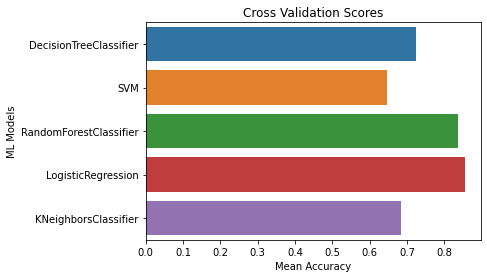

In [175]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier", "LogisticRegression", "KNeighborsClassifier"]})

g = sn.barplot("Cross Validation Means", "ML Models", data=cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

# Deep Learning
- Neural network

### Neural network

In [183]:
# imports
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [201]:
# define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100


C:\Users\Ana\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


8/8 [==============================] - 2s 65ms/step - loss: 4.6621 - accuracy: 0.4802 - val_loss: 2.9155 - val_accuracy: 0.5395
Epoch 2/100
8/8 [==============================] - 0s 16ms/step - loss: 1.9431 - accuracy: 0.5419 - val_loss: 1.2640 - val_accuracy: 0.4605
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 1.2408 - accuracy: 0.4714 - val_loss: 0.9070 - val_accuracy: 0.5921
Epoch 4/100
8/8 [==============================] - 0s 13ms/step - loss: 1.0781 - accuracy: 0.5859 - val_loss: 0.5247 - val_accuracy: 0.6974
Epoch 5/100
8/8 [==============================] - 0s 36ms/step - loss: 0.7676 - accuracy: 0.5903 - val_loss: 0.5102 - val_accuracy: 0.7368
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 0.7826 - accuracy: 0.6300 - val_loss: 0.4960 - val_accuracy: 0.7500
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 0.6738 - accuracy: 0.6256 - val_loss: 0.4841 - val_accuracy: 0.7500
Epoch 8/100
8/8 [===============

In [237]:
# evaluate the model
x_score, y_score = model.evaluate(X_test, y_test)
print(f"\nFeatures score:", x_score, "\nLabels score: ", y_score)

# accuracy
score_nn = scores[1]
print(f"\nAccuracy: {score_nn:.2f}")

3/3 [==============================] - 0s 7ms/step - loss: 0.4209 - accuracy: 0.8289

Features score: 0.4209171235561371 
Labels score:  0.8289473652839661

Accuracy: 0.74


# Conclusions

In [240]:
all_scores = [score_svm, score_lr, score_knn, score_dt, mean_scores_rf, score_nn]
all_algorithms = ["Support Vector Machine", "Logistic Regression", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Neural Network"]    

for i in range(len(all_algorithms)):
    print(f"\nThe accuracy score of the " + all_algorithms[i] + " model is " + str(all_scores[i]))


The accuracy score of the Support Vector Machine model is 0.8421052631578947

The accuracy score of the Logistic Regression model is 0.881578947368421

The accuracy score of the K-Nearest Neighbors model is 0.75

The accuracy score of the Decision Tree model is 0.7368421052631579

The accuracy score of the Random Forest model is 0.8421052631578947

The accuracy score of the Neural Network model is 0.7391304347826086


C:\Users\Ana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


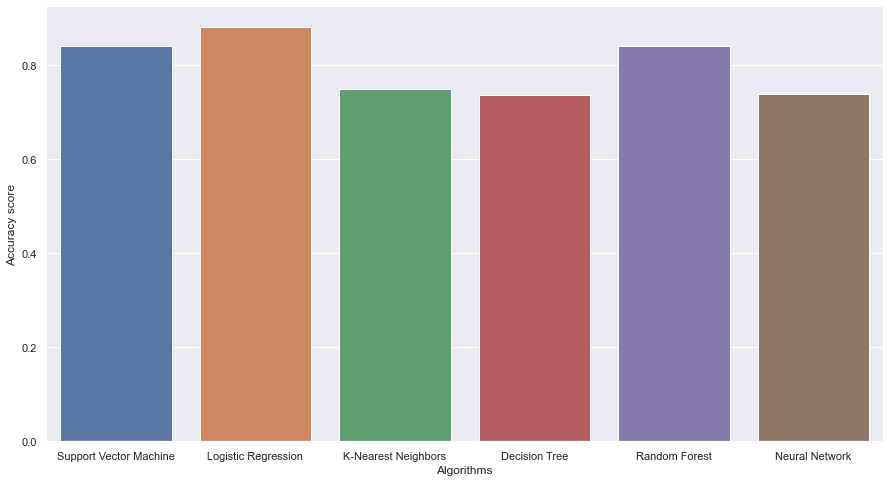

In [241]:
sn.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sn.barplot(all_algorithms, all_scores)

The Logistic Regression model performed best compared to the other algorithms. Apart from the latter, the Random Forest and Support Vector Machine models scored above 80%.

The K-Nearest Neighbors, Decision Tree and Neural Network models had the lowest scores.

Due to the shape of the dataset, we were unable to perform any further analysis, namely the unsupervised learning clustering analysis.

A future approach could be to use the XGBoost classifier algorithm and explore cross validation, hyperparameter tuning and neural networks in more depth.